In [1]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
import os
import matplotlib.pyplot as plt
import json
import random

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# output metrics
results_dir = os.listdir('../results/')

for dir in results_dir:
    for file in ['evaluate_data.json', 'train_data.json']:
        with open(f'../results/{dir}/{file}', 'r') as f:
            data = json.load(f)

        if 'evaluate' in file:
            preds = data['preds']
            labels = data['labels']
            print(f"Model: {dir}")
            print(f"Acc: {accuracy_score(labels, preds)}")
            print(f"F1: {f1_score(labels, preds)}")
            print(f"recall: {recall_score(labels, preds)}")

Model: bert_regular_all
Acc: 0.5628985507246377
F1: 0.7161144578313253
recall: 0.7018450184501845
Model: bert_regular_all_compact
Acc: 0.8009259259259259
F1: 0.8894601542416453
recall: 0.9942528735632183
Model: bert_compact_text
Acc: 0.8055555555555556
F1: 0.8923076923076924
recall: 1.0
Model: bert_regular_text
Acc: 0.7855072463768116
F1: 0.8798701298701299
recall: 1.0
Model: bert_regular_all_expand
Acc: 0.6915942028985507
F1: 0.7990936555891238
recall: 0.7808118081180812


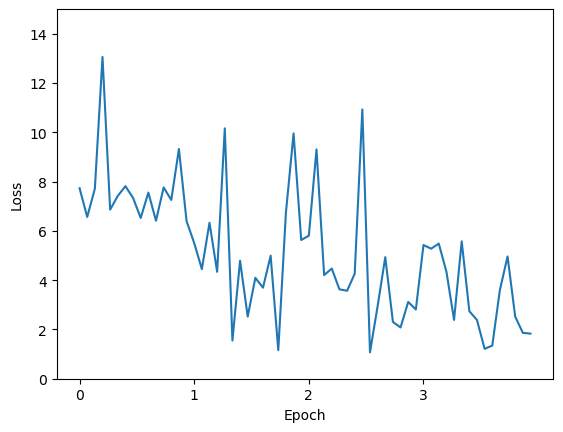

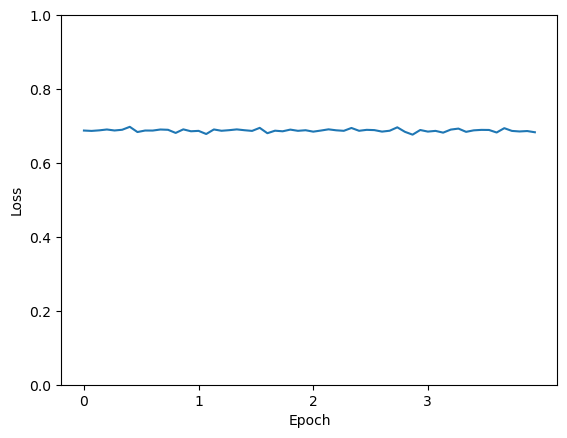

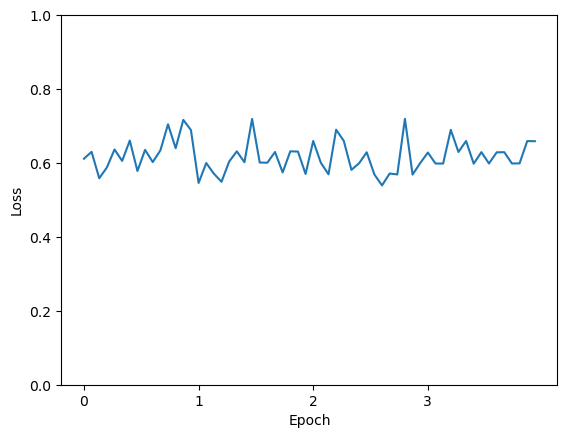

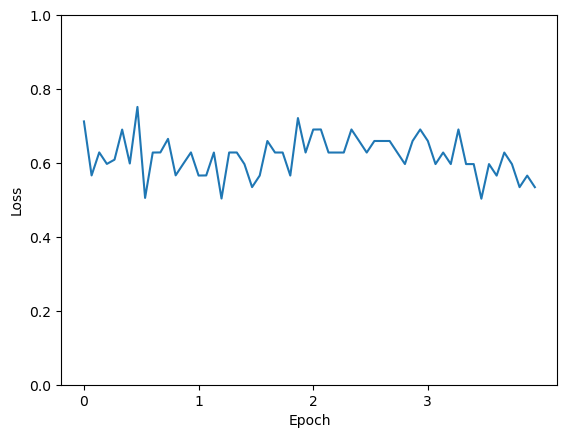

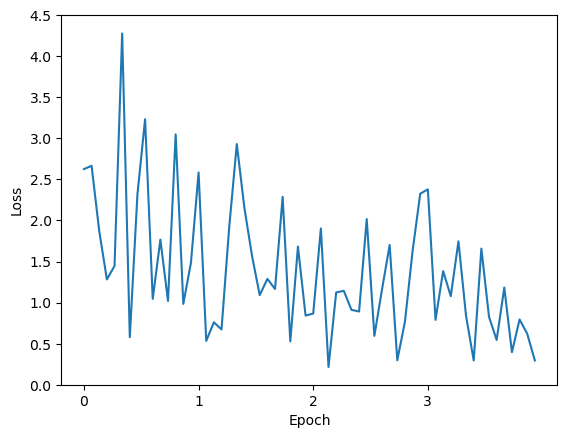

In [9]:
# create loss plots
results_dir = os.listdir('../results/')
os.makedirs('../plots', exist_ok=True)

for dir in results_dir:
    for file in ['evaluate_data.json', 'train_data.json']:
        with open(f'../results/{dir}/{file}', 'r') as f:
            data = json.load(f)

        if file == 'train_data.json':
            losses = []
            for epoch in range(4):
                to_plot = random.sample(data[str(epoch)]['losses'], 15)
                losses.extend(to_plot)


            fig, ax = plt.subplots()

            epochs = range(4)
            ax.set_xticks(range(0, len(losses), len(losses) // len(epochs)))
            ax.set_xticklabels([0,1,2,3])
            ax.plot(losses)
            ax.set_ylim(0,1)
            if dir == 'bert_regular_all_expand':
                ax.set_ylim(0,4.5)
            if dir == 'bert_regular_all':
                ax.set_ylim(0,15)
            ax.set_xlabel('Epoch')
            ax.set_ylabel('Loss')
            plt.savefig(f"../plots/{dir}_loss.png", dpi=600)